# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import torch
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Episode 100	Average Score: 0.84
Episode 200	Average Score: 3.73
Episode 300	Average Score: 7.14
Episode 400	Average Score: 10.35
Episode 500	Average Score: 12.18
Episode 540	Average Score: 13.02
Environment solved in 440 episodes!	Average Score: 13.02
Episode 545	Average Score: 13.03
Environment solved in 445 episodes!	Average Score: 13.03
Episode 546	Average Score: 13.02
Environment solved in 446 episodes!	Average Score: 13.02
Episode 559	Average Score: 13.11
Environment solved in 459 episodes!	Average Score: 13.11
Episode 560	Average Score: 13.08
Environment solved in 460 episodes!	Average Score: 13.08
Episode 561	Average Score: 13.07
Environment solved in 461 episodes!	Average Score: 13.07
Episode 562	Average Score: 13.01
Environment solved in 462 episodes!	Average Score: 13.01
Episode 563	Average Score: 13.09
Environment solved in 463 episodes!	Average Score: 13.09
Episode 564	Average Score: 13.09
Environment solved in 464 episodes!	Average Score: 13.09
Episode 565	Average Score: 1

Episode 646	Average Score: 13.87
Environment solved in 546 episodes!	Average Score: 13.87
Episode 647	Average Score: 13.92
Environment solved in 547 episodes!	Average Score: 13.92
Episode 648	Average Score: 14.00
Environment solved in 548 episodes!	Average Score: 14.00
Episode 649	Average Score: 14.04
Environment solved in 549 episodes!	Average Score: 14.04
Episode 650	Average Score: 14.09
Environment solved in 550 episodes!	Average Score: 14.09
Episode 651	Average Score: 14.08
Environment solved in 551 episodes!	Average Score: 14.08
Episode 652	Average Score: 14.15
Environment solved in 552 episodes!	Average Score: 14.15
Episode 653	Average Score: 14.15
Environment solved in 553 episodes!	Average Score: 14.15
Episode 654	Average Score: 14.15
Environment solved in 554 episodes!	Average Score: 14.15
Episode 655	Average Score: 14.12
Environment solved in 555 episodes!	Average Score: 14.12
Episode 656	Average Score: 14.23
Environment solved in 556 episodes!	Average Score: 14.23
Episode 65

Episode 738	Average Score: 15.15
Environment solved in 638 episodes!	Average Score: 15.15
Episode 739	Average Score: 15.13
Environment solved in 639 episodes!	Average Score: 15.13
Episode 740	Average Score: 15.15
Environment solved in 640 episodes!	Average Score: 15.15
Episode 741	Average Score: 15.15
Environment solved in 641 episodes!	Average Score: 15.15
Episode 742	Average Score: 15.12
Environment solved in 642 episodes!	Average Score: 15.12
Episode 743	Average Score: 15.01
Environment solved in 643 episodes!	Average Score: 15.01
Episode 744	Average Score: 15.17
Environment solved in 644 episodes!	Average Score: 15.17
Episode 745	Average Score: 15.19
Environment solved in 645 episodes!	Average Score: 15.19
Episode 746	Average Score: 15.17
Environment solved in 646 episodes!	Average Score: 15.17
Episode 747	Average Score: 15.20
Environment solved in 647 episodes!	Average Score: 15.20
Episode 748	Average Score: 15.24
Environment solved in 648 episodes!	Average Score: 15.24
Episode 74

Episode 830	Average Score: 15.61
Environment solved in 730 episodes!	Average Score: 15.61
Episode 831	Average Score: 15.69
Environment solved in 731 episodes!	Average Score: 15.69
Episode 832	Average Score: 15.67
Environment solved in 732 episodes!	Average Score: 15.67
Episode 833	Average Score: 15.69
Environment solved in 733 episodes!	Average Score: 15.69
Episode 834	Average Score: 15.68
Environment solved in 734 episodes!	Average Score: 15.68
Episode 835	Average Score: 15.71
Environment solved in 735 episodes!	Average Score: 15.71
Episode 836	Average Score: 15.75
Environment solved in 736 episodes!	Average Score: 15.75
Episode 837	Average Score: 15.77
Environment solved in 737 episodes!	Average Score: 15.77
Episode 838	Average Score: 15.73
Environment solved in 738 episodes!	Average Score: 15.73
Episode 839	Average Score: 15.75
Environment solved in 739 episodes!	Average Score: 15.75
Episode 840	Average Score: 15.69
Environment solved in 740 episodes!	Average Score: 15.69
Episode 84

Episode 922	Average Score: 15.76
Environment solved in 822 episodes!	Average Score: 15.76
Episode 923	Average Score: 15.71
Environment solved in 823 episodes!	Average Score: 15.71
Episode 924	Average Score: 15.74
Environment solved in 824 episodes!	Average Score: 15.74
Episode 925	Average Score: 15.76
Environment solved in 825 episodes!	Average Score: 15.76
Episode 926	Average Score: 15.72
Environment solved in 826 episodes!	Average Score: 15.72
Episode 927	Average Score: 15.74
Environment solved in 827 episodes!	Average Score: 15.74
Episode 928	Average Score: 15.72
Environment solved in 828 episodes!	Average Score: 15.72
Episode 929	Average Score: 15.59
Environment solved in 829 episodes!	Average Score: 15.59
Episode 930	Average Score: 15.67
Environment solved in 830 episodes!	Average Score: 15.67
Episode 931	Average Score: 15.58
Environment solved in 831 episodes!	Average Score: 15.58
Episode 932	Average Score: 15.56
Environment solved in 832 episodes!	Average Score: 15.56
Episode 93

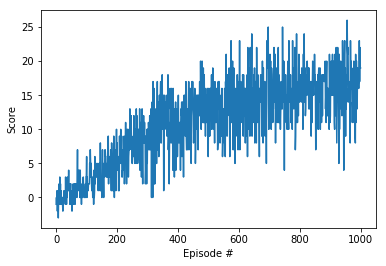

In [7]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = int(agent.act(state, eps))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model_weights.pth')
            #break
    return scores

agent = Agent(state_size=37, action_size=4, seed=0)
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
# load the weights from file
agent = Agent(state_size=37, action_size=4, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('model_weights.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = int(agent.act(state))                 # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0
